# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data contains features of patients who scheduled appointments at the doctor, together with if they attended the appointment or not

### Dataset columns
1. PatientId : Unique patient id number
2. AppointmentID : unique appointment id number
3. Gender : M for Male, F for Female
4. AppointmentDay : Day of the said appointment
5. ScheduledDay : Day the appointment was made
6. Age : Age of patients
7. Neighbourhood : Location of the hospital
8. Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. ref: https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub
0 and 1 values below indicate False or True
9. Hipertension : 0 or 1
10. Diabetes : 0 or 1
11. Alcoholism : 0 or 1
12. Handcap : 0 or 1
13. SMS_received : 0 or 1
14. No-show : 0 or 1

### Question(s) for Analysis
1. Are there more attendances than absentees?
2. How do these feautures affect attendance
3. What is the most frequent time/day/hour?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.6MB/s eta 0:00:01   48% |███████████████▊                | 5.1MB 25.4MB/s eta 0:00:01    60% |███████████████████▍            | 6.3MB 27.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01   22% |███████▏                        | 3.0MB 18.4MB/s eta 0:00:01    30% |█████████▋                      | 4.0MB 16.2MB/s eta 0:00:01    46% |██████████████▉                 | 6.2MB 24.7MB/s eta 0:00:01    54% |█████████████████▌              | 7.3MB 26.7MB/s eta 0:00:01    63% |████████████████████▏           | 8.5MB 21.5MB/s eta 0:00:01    78% |█████████████████████████▏      | 10.5MB 17.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully unin

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Problem 1. The day columns are not of datetime type
Problem 2. PatientId is type float instead of int


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Observation 1. There are more appointmentIDs than PatientIds, suggesting many patients had many appointments
Problem 3. Handcap column is supposed to have only 2 values like the other columns

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.isnull().sum().sum()

0

Observation 2. So there are no null values
Problem 4. Age min value is -1


### Data Cleaning
 

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Rename 

Problem 1. The day columns are not of datetime type
Problem 2. PatientId is type float instead of int
Problem 3. Handcap column is supposed to have only 2 values like the other columns
Problem 4. Age min value is -1
Problem 5. Rename No-show column to "show" and change values to numeric

In [8]:
#Problem 5. Rename No-show column to "show" and change values to numeric
df.rename(columns = {"No-show" : "show"}, inplace=True)
df["show"] = df["show"].map({"Yes" : 0, "No" : 1})
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1


In [9]:
#Problem 2. Change PatientId type to int
df.PatientId = df.PatientId.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
show              110527 non-null int64
dtypes: int64(10), object(4)
memory usage: 11.8+ MB


In [10]:
#Problem 1. Changing day columns to datetime
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[["ScheduledDay", "AppointmentDay"]].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

In [11]:
#creating more granular date and time columns

df["ScheduledHour"] = pd.to_datetime(df.ScheduledDay).dt.hour
df["AppointmentTime"] = pd.to_datetime(df.AppointmentDay).dt.time

In [12]:
#function definition to convert these columns to date format so they are not redundant
def hour(col_name):
    df[col_name] = df[col_name].dt.date

hour("ScheduledDay")
hour("AppointmentDay")

In [12]:
#converting these columns to date format so they are not redundant
#df["ScheduledDay"] = df["ScheduledDay"].dt.date
#df["AppointmentDay"] = df["AppointmentDay"].dt.date

In [13]:
#creating months and day of the week
df["AppointmentWeekDay"] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df["AppointmentMonth"] = pd.to_datetime(df.AppointmentDay).dt.month_name()

In [14]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledHour,AppointmentTime,AppointmentWeekDay,AppointmentMonth
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,00:00:00,Friday,April
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,00:00:00,Friday,April
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,16,00:00:00,Friday,April
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,17,00:00:00,Friday,April
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,16,00:00:00,Friday,April


In [15]:
#waiting days calculation
df["WaitingDays"] = df.AppointmentDay - df.ScheduledDay

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
PatientId             110527 non-null int64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null object
AppointmentDay        110527 non-null object
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
show                  110527 non-null int64
ScheduledHour         110527 non-null int64
AppointmentTime       110527 non-null object
AppointmentWeekDay    110527 non-null object
AppointmentMonth      110527 non-null object
WaitingDays           110527 non-null timedelta64[ns]
dtypes: int64(11), object(7), timede

In [17]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledHour,AppointmentTime,AppointmentWeekDay,AppointmentMonth,WaitingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,00:00:00,Friday,April,0 days


In [18]:
#changing the type of waitingdays to int
df.WaitingDays = df.WaitingDays.astype("str")
df.WaitingDays = df.WaitingDays.apply(lambda x: x.split()[0])
df.WaitingDays = df.WaitingDays.astype("int64")

In [19]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledHour,AppointmentTime,AppointmentWeekDay,AppointmentMonth,WaitingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,00:00:00,Friday,April,0


In [20]:
df.AppointmentTime.nunique()

1

AppointmentTime column just created, seems to have just one value and that is irrelevant. We would drop that

In [21]:
df.drop(columns = "AppointmentTime", inplace=True)

In [22]:
error = df.query("WaitingDays < 0")

I just realised that some of the appointmentdays are negative, which is impossible. This means the ScheduledDay is after the AppointmentDay. We drop that

In [23]:
new_df = df.query("WaitingDays >= 0")
new_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledHour,AppointmentWeekDay,AppointmentMonth,WaitingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,18,Friday,April,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,16,Friday,April,0


In [24]:
#check if it was successful
new_df.query("WaitingDays < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,ScheduledHour,AppointmentWeekDay,AppointmentMonth,WaitingDays


In [25]:
#reassign new_df to df
df = new_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 18 columns):
PatientId             110522 non-null int64
AppointmentID         110522 non-null int64
Gender                110522 non-null object
ScheduledDay          110522 non-null object
AppointmentDay        110522 non-null object
Age                   110522 non-null int64
Neighbourhood         110522 non-null object
Scholarship           110522 non-null int64
Hipertension          110522 non-null int64
Diabetes              110522 non-null int64
Alcoholism            110522 non-null int64
Handcap               110522 non-null int64
SMS_received          110522 non-null int64
show                  110522 non-null int64
ScheduledHour         110522 non-null int64
AppointmentWeekDay    110522 non-null object
AppointmentMonth      110522 non-null object
WaitingDays           110522 non-null int64
dtypes: int64(12), object(6)
memory usage: 16.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the rate of attendace?)

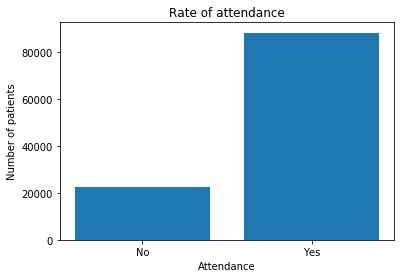

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data = df.show.value_counts()
plt.title("Rate of attendance")
plt.xlabel("Attendance")
plt.ylabel("Number of patients")
plt.bar(["Yes", "No"], data.values);

From the chart above, one can see that there are more attendees than there are absentees. Roughly 75% to 25%

### Research Question 2  (Classification of Attendance by Gender)

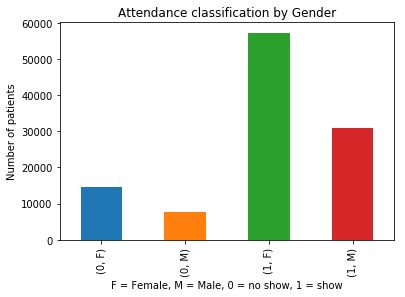

In [27]:
data = df.groupby(["show", "Gender"]).size().plot(kind = "bar")
plt.ylabel("Number of patients")
plt.title("Attendance classification by Gender")
plt.xlabel("F = Female, M = Male, 0 = no show, 1 = show");

As you can see, There are more females in this data, and they hold the highest portion of attendances, as well as a higher portion of absentees.

### Research Question 3  (What is the most frequent time)

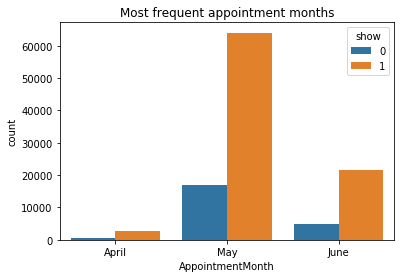

In [29]:
sns.countplot(x = "AppointmentMonth", data = df, hue = "show").set(title = "Most frequent appointment months");

The most frequent appointment month is May

### Research Question 4 (What is the most frequent hour)

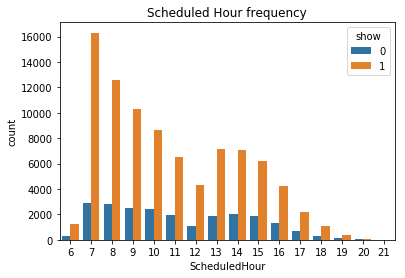

In [30]:
sns.countplot(x = "ScheduledHour", data = df, hue = "show").set(title = "Scheduled Hour frequency");

The most frequent scheduled hour is between 7 and 9 am.

<a id='conclusions'></a>
## Conclusions

- The rate of attendance is just around 75%
- There were no missing values, however, there were abnormal records like the age of -1
- There are more women, but the rate of attendance of both genders is quite similar
- The most frequent appointment month is May
- There is little effect of scheduled appointment hour on attendance

### Limitations
- The nature of the data made it somewhat difficult to perform statistical analyses. A change of data values was needed e.g, "No-show" column and it's values were in string type. It had to be represented by integers to make it valid for statistical analysis

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0